In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def hard_limit(x):
    return np.where(x >= 0, 1, 0)

def radial_basis(x):
    return np.exp(-x**2)

In [3]:
# Given weight matrices and biases
Vt = np.array([[-2.69, -2.80], [-3.39, -4.56]])
bv = np.array([-2.21, 4.76])
W = np.array([-4.91, 4.95])
bw = -2.28

In [4]:
# Function to compute neural network output
def neural_network_output(x1, x2, activation_function):
    x = np.array([x1, x2])
    z = activation_function(Vt.dot(x) + bv)
    y = W.dot(z) + bw
    return y

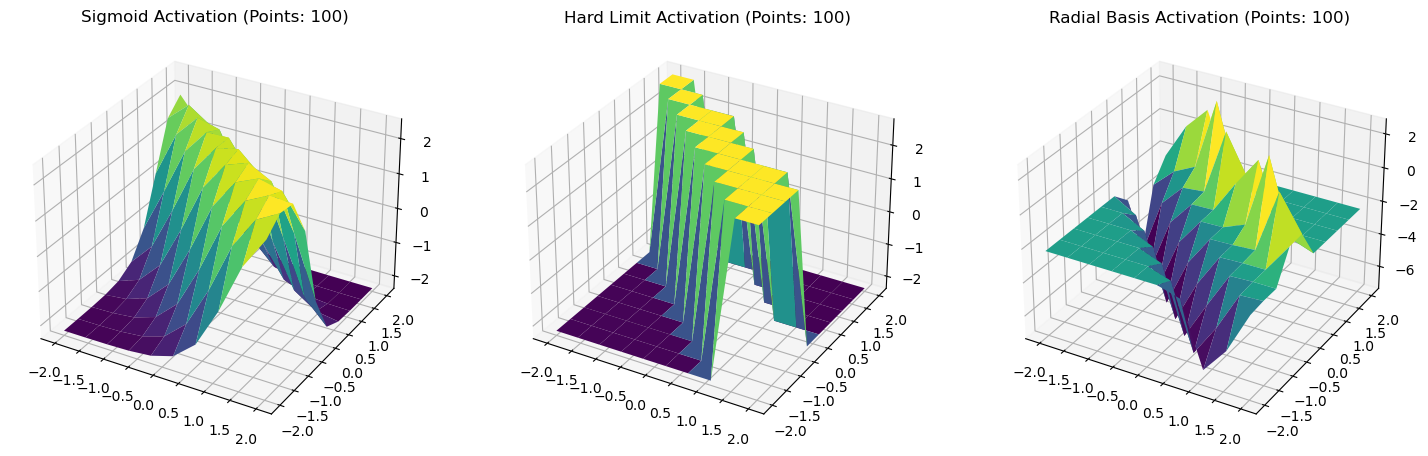

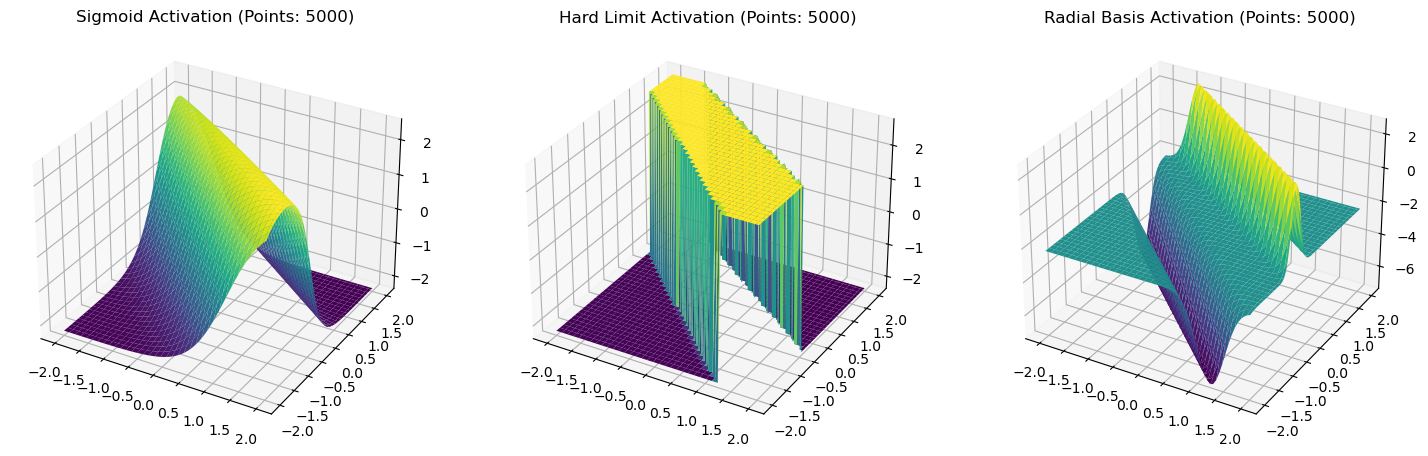

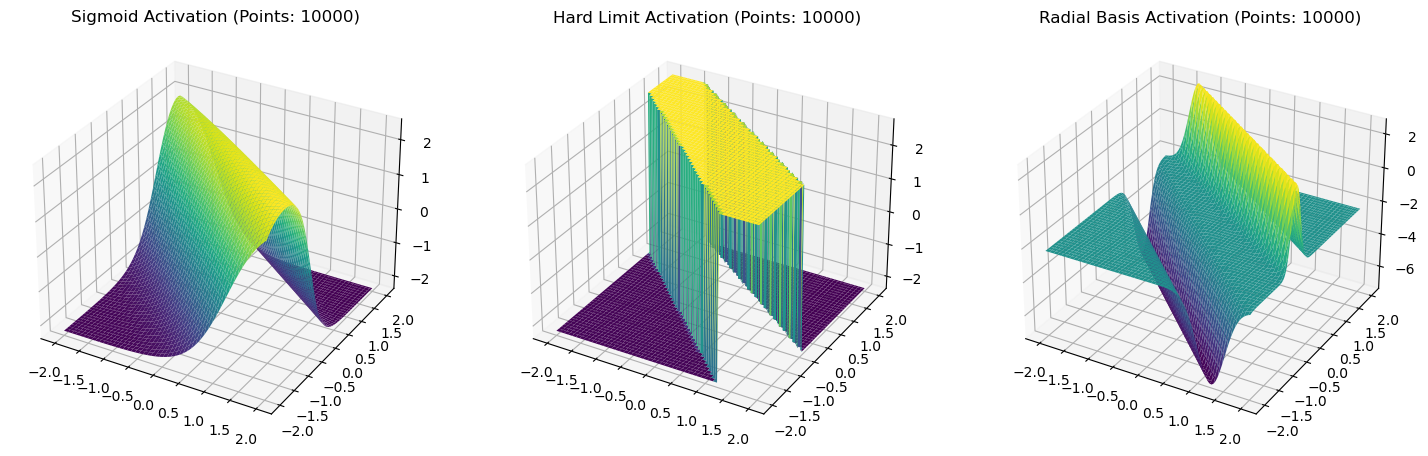

In [10]:
# Generate sample points
for num_points in [100, 5000, 10000]:
    x1 = np.linspace(-2, 2, int(np.sqrt(num_points)))
    x2 = np.linspace(-2, 2, int(np.sqrt(num_points)))
    X1, X2 = np.meshgrid(x1, x2)

    # Compute outputs
    Y_sigmoid = np.zeros(X1.shape)
    Y_hard_limit = np.zeros(X1.shape)
    Y_rbf = np.zeros(X1.shape)


    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            Y_sigmoid[i, j] = neural_network_output(X1[i, j], X2[i, j], sigmoid)
            Y_hard_limit[i, j] = neural_network_output(X1[i, j], X2[i, j], hard_limit)
            Y_rbf[i, j] = neural_network_output(X1[i, j], X2[i, j], radial_basis)
            # Plot output surfaces
    fig = plt.figure(figsize=(18, 6))

    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(X1, X2, Y_sigmoid, cmap='viridis')
    ax1.set_title(f"Sigmoid Activation (Points: {num_points})")

    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(X1, X2, Y_hard_limit, cmap='viridis')
    ax2.set_title(f"Hard Limit Activation (Points: {num_points})")

    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot_surface(X1, X2, Y_rbf, cmap='viridis')
    ax3.set_title(f"Radial Basis Activation (Points: {num_points})")
    # Save the plot
    plt.savefig(f'problem3/plot_{num_points}.png')

    plt.show()